In [2]:
import serial
ser = serial.Serial()
ser=serial.Serial("/dev/cu.usbmodem21202",115200, timeout=0.1)

There still exsits the bug with value error, it seems that the serial data only return one R or one G or one B each time we write a comma.

In [64]:
ser.flushInput()
ser.write(b",")
serial_data = str(ser.readline().decode('utf8')).rstrip()
rgb = tuple([int(value) for value in serial_data.split("-")])
rgb

ValueError: invalid literal for int() with base 10: 'R:131'

In [31]:
ser.write(b",")
serial_data = str(ser.readline().decode('utf8')).rstrip()

# Create a dictionary to store the RGB values
rgb_dict = {}

# Assuming the serial_data looks like 'R:169-G:128-B:255'
data_parts = serial_data.split("-")
for data_part in data_parts:
    color_value = data_part.split(":")
    if len(color_value) == 2 and color_value[0] in ['R', 'G', 'B']:
        color_name = color_value[0]
        color_intensity = int(color_value[1])
        rgb_dict[color_name] = color_intensity
    else:
        print("Error: Invalid data format. Skipping part:", data_part)

# Check if all three RGB values are present in the dictionary
if len(rgb_dict) == 3 and all(key in rgb_dict for key in ['R', 'G', 'B']):
    # Extract the RGB values from the dictionary
    r_value = rgb_dict['R']
    g_value = rgb_dict['G']
    b_value = rgb_dict['B']
    rgb = (r_value, g_value, b_value)
    # Now you can use the rgb tuple (e.g., print it, process it further, etc.)
else:
    print("Error: RGB values not received properly.")


Error: RGB values not received properly.


In [4]:
import time

# Function to read RGB data from serial communication
def read_rgb_from_serial():
    for _ in range(3):
        ser.write(b",")  # Send the data
        time.sleep(0.1)  # Add a delay to give the receiving end time to process the data

    # Read the data after the last iteration
    serial_data = ser.readline().decode('utf8').rstrip()
    if serial_data.startswith('RGB'):
        rgb_values = serial_data[4:].split(',')  # Extract values after 'RGB:' and split by comma
        try:
            r = int(rgb_values[0])
            g = int(rgb_values[1])
            b = int(rgb_values[2])
            return (r, g, b)
        except ValueError:
            print("Error: Invalid RGB data format")
            return None
    else:
        print("Error: Invalid data format")
        return None

# Send a request to the external device to start sending the RGB tuple
ser.write(b",")

# Read the RGB tuple
received_rgb = read_rgb_from_serial()

# Print the RGB value
if received_rgb:
    print("Received RGB value:", received_rgb)
    # You can access individual components as received_rgb[0], received_rgb[1], received_rgb[2]




Error: Invalid data format


To solve this, let's try if we write comma three times

In [5]:
ser.write(b",")
serial_data = str(ser.readline().decode('utf8')).rstrip()
print(serial_data)
ser.write(b",")
serial_data = str(ser.readline().decode('utf8')).rstrip()
print(serial_data)
ser.write(b",")
serial_data = str(ser.readline().decode('utf8')).rstrip()
print(serial_data)

99-113-82
98-112-81
98112-81


It's now returning R and G and B separately.

In [6]:
import time

# Send the data and read multiple times with delays
for _ in range(3):
    ser.write(b",")  # Send the data
    time.sleep(0.1)    # Add a delay to give the receiving end time to process the data

    serial_data = ser.readline().decode('utf8').rstrip()  # Read the data
    print(serial_data)




98-11281
9-112-81                
98-112-81


# Solution

In [10]:
# Function to read RGB data from serial communication
def read_rgb_from_serial():
    received_data = ""  # Variable to store the received data

    for _ in range(3):
        ser.write(b",")  # Send the data
        time.sleep(0.1)  # Add a delay to give the receiving end time to process the data

        serial_data = ser.readline().decode('utf8').rstrip()  # Read the data
        received_data += serial_data  # Append the received data to the variable

    return received_data

# Send a request to the external device to start sending the RGB tuple
ser.write(b",")

# Read the RGB data for three times and concatenate it
received_data = read_rgb_from_serial()

# Print the concatenated data
print("Received data:", received_data)

# Extract R, G, and B values from the received data
r_index = received_data.find('R:') + 2  # Find the index of 'R:' and add 2 to skip 'R:'
g_index = received_data.find('G:') + 2  # Find the index of 'G:' and add 2 to skip 'G:'
b_index = received_data.find('B:') + 2  # Find the index of 'B:' and add 2 to skip 'B:'

r_value = int(received_data[r_index:g_index-2])  # Extract R value as an integer
g_value = int(received_data[g_index:b_index-2])  # Extract G value as an integer
b_value = int(received_data[b_index:])  # Extract B value as an integer

# Print the RGB values
print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))



9-109-80


ValueError: invalid literal for int() with base 10: '7-110-8097-110-09-110-80                    \r9-109-8'

Now it finally return to a RGB value now, let's try again.

In [23]:
# Function to read RGB data from serial communication
import time
def read_rgb_from_serial():
    received_data = ""  # Variable to store the received data

    for _ in range(3):
        ser.write(b",")  # Send the data
        time.sleep(0.1)  # Add a delay to give the receiving end time to process the data

        serial_data = ser.readline().decode('utf8').rstrip()  # Read the data
        received_data += serial_data  # Append the received data to the variable

    return received_data

# Send a request to the external device to start sending the RGB tuple
ser.write(b",")

# Read the RGB data for three times and concatenate it
received_data = read_rgb_from_serial()

# Print the concatenated data
print("Received data:", received_data)

# Extract R, G, and B values from the received data
r_index = received_data.find('R:') + 2  # Find the index of 'R:' and add 2 to skip 'R:'
g_index = received_data.find('G:') + 2  # Find the index of 'G:' and add 2 to skip 'G:'
b_index = received_data.find('B:') + 2  # Find the index of 'B:' and add 2 to skip 'B:'

r_value = int(received_data[r_index:g_index-2])  # Extract R value as an integer
g_value = int(received_data[g_index:b_index-2])  # Extract G value as an integer
b_value = int(received_data[b_index:])  # Extract B value as an integer

# Print the RGB values
print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))


Received data: B:74R124G:9


ValueError: invalid literal for int() with base 10: ':74R124'

So it seems that sometimes it will give the data in other orders rather R-G-B, now update the version of solution to be robust.

In [24]:
import time
import re

# Function to read RGB data from serial communication
def read_rgb_from_serial():
    received_data = ""  # Variable to store the received data

    for _ in range(3):
        ser.write(b",")  # Send the data
        time.sleep(0.1)  # Add a delay to give the receiving end time to process the data

        serial_data = ser.readline().decode('utf8').rstrip()  # Read the data
        received_data += serial_data  # Append the received data to the variable

    return received_data

# Send a request to the external device to start sending the RGB tuple
ser.write(b",")

# Read the RGB data for three times and concatenate it
received_data = read_rgb_from_serial()

# Print the concatenated data
print("Received data:", received_data)

# Use regular expressions to extract R, G, and B values from the received data
regex_pattern = r'R:(\d+)G:(\d+)B:(\d+)|B:(\d+)R:(\d+)G:(\d+)|G:(\d+)B:(\d+)R:(\d+)'
match = re.search(regex_pattern, received_data)

if match:
    r_value = int(match.group(1) or match.group(5) or match.group(8))
    g_value = int(match.group(2) or match.group(6) or match.group(9))
    b_value = int(match.group(3) or match.group(4) or match.group(7))

    # Print the RGB values
    print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))
else:
    print("Error: Invalid data format")


Received data: B:74R:126G:99
RGB Tuple: (126, 99, 74)


Looks great now even the received data is B:74R:126G:99, now combine it with the rest of codes.

In [63]:
import time
import re

def read_rgb_from_serial():
    received_data = ""

    for _ in range(3):
        ser.write(b",")
        time.sleep(0.1)
        serial_data = ser.readline().decode('utf8').rstrip()
        received_data += serial_data

    return received_data

def characterise():
    # Send a request to the external device to start sending the RGB tuple
    ser.write(b",")

    # Read the RGB data for three times and concatenate it
    received_data = read_rgb_from_serial()

    # Print the concatenated data
    # print("Received data:", received_data)

    # Initialize RGB variables to None
    r_value, g_value, b_value = None, None, None

    # Use regular expressions to extract R, G, and B values from the received data
    regex_pattern = r'R:(\d+)G:(\d+)B:(\d+)|B:(\d+)R:(\d+)G:(\d+)|G:(\d+)B:(\d+)R:(\d+)'
    match = re.search(regex_pattern, received_data)

    if match:
        r_value = int(match.group(1) or match.group(5) or match.group(8))
        g_value = int(match.group(2) or match.group(6) or match.group(9))
        b_value = int(match.group(3) or match.group(4) or match.group(7))

        # Print the RGB values
        # print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))
        return (r_value, g_value, b_value)
    else:
        print("Error: Invalid data format")
        return None


In [64]:
characterise()

(101, 141, 104)

## (3) Planning: Using different search strategies: Random, Grid, Bayesian Optimisation

### (3.1) Generate a random color with CV2

several bugs in this following original codes: I've fixed some but just decided to rewrite.

In [65]:
import random
import numpy as np
import cv2

# Function to generate random color
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

# Function to calculate the loss between two colors
def calculate_loss(color1, color2):
    return np.sqrt(
        (color1[0] - color2["R"]) ** 2
        + (color1[1] - color2["G"]) ** 2
        + (color1[2] - color2["B"]) ** 2
    )

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (0, 0, 255)  # Red color (BGR format)

# Create an empty list to store the loss values
loss_values = []

# Main loop
# Main loop
num_iterations = 0  # Initialize the iteration counter
max_iterations = 200  # Set the desired number of iterations

candidate_color = (0,0,0) # Initial candidate

for iteration in range(max_iterations):
    

    # STEP 1: Synthesis
    # Update the live image with the current color
    image[:, :] = candidate_color
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color
    rgb_measurement = characterise()
    # rgb_measurement = tuple(reversed(rgb_measurement))
    
    # STEP 3: Planning
    
    # Calculate the loss between the goal color and the current color
    loss = calculate_loss(goal_color, rgb_measurement)

    # Add the loss value to the list
    loss_values.append(loss)    

    # Add text information to the image
    text = f"Iteration: {num_iterations + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), goal_color, -1)

    # Add text for the loss
    loss_text = f"Loss: {loss:.2f}"
    cv2.putText(image, loss_text, (10, height - 10), font, font_scale, font_color, 2)

    # Draw the graph of loss values
    if len(loss_values) > 1:
        for i in range(1, len(loss_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(loss_values[i - 1] * (height - 60) / max(loss_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(loss_values[i] * (height - 60) / max(loss_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(100)  # Adjust the wait time (in milliseconds) as needed
    
    # Generate a new candidate color, for now we will pick one randomly
    candidate_color = generate_random_color()
    
    num_iterations += 1

# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

TypeError: tuple indices must be integers or slices, not str

In [66]:
import numpy as np
import time
import re

# Function to read RGB data from serial communication
def read_rgb_from_serial():
    received_data = ""
    for _ in range(3):
        ser.write(b",")
        time.sleep(0.1)
        serial_data = ser.readline().decode('utf8').rstrip()
        received_data += serial_data
    return received_data

# Function to calculate the loss between two colors
def calculate_loss(color1, color2):
    return np.sqrt(
        (color1[0] - color2[0]) ** 2
        + (color1[1] - color2[1]) ** 2
        + (color1[2] - color2[2]) ** 2
    )

def characterise():
    # Send a request to the external device to start sending the RGB tuple
    ser.write(b",")

    # Read the RGB data for three times and concatenate it
    received_data = read_rgb_from_serial()

    # Print the concatenated data
    print("Received data:", received_data)

    # Use regular expressions to extract R, G, and B values from the received data
    regex_pattern = r'R:(\d+)G:(\d+)B:(\d+)|B:(\d+)R:(\d+)G:(\d+)|G:(\d+)B:(\d+)R:(\d+)'
    match = re.search(regex_pattern, received_data)

    if match:
        r_value = int(match.group(1) or match.group(5) or match.group(8))
        g_value = int(match.group(2) or match.group(6) or match.group(9))
        b_value = int(match.group(3) or match.group(4) or match.group(7))

        # Print the RGB values
        print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))
        return (r_value, g_value, b_value)
    else:
        print("Error: Invalid data format")
        return None

# Example usage:
# Assuming you have a goal_color defined as a tuple (e.g., (255, 0, 0) for red)
goal_color = (255, 0, 0)
rgb_measurement = characterise()

if rgb_measurement is not None:
    # Calculate the loss between the goal color and the current color
    loss = calculate_loss(goal_color, rgb_measurement)

    # Add the loss value to the list or perform other tasks with it
    print("Loss:", loss)


B:103ved data: B:103R:41G:10                       
RGB Tuple: (41, 10, 103)
Loss: 237.70780382646254


looks good now

In [74]:
import random
import numpy as np
import cv2

# Function to generate random color
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

def read_rgb_from_serial():
    received_data = ""
    for _ in range(3):
        ser.write(b",")
        time.sleep(0.1)
        serial_data = ser.readline().decode('utf8').rstrip()
        received_data += serial_data
    return received_data

# Function to calculate the loss between two colors
def calculate_loss(color1, color2):
    return np.sqrt(
        (color1[0] - color2[0]) ** 2
        + (color1[1] - color2[1]) ** 2
        + (color1[2] - color2[2]) ** 2
    )
def characterise():
    # Send a request to the external device to start sending the RGB tuple
    ser.write(b",")

    # Read the RGB data for three times and concatenate it
    received_data = read_rgb_from_serial()

    # Print the concatenated data
    # print("Received data:", received_data)

    # Use regular expressions to extract R, G, and B values from the received data
    regex_pattern = r'R:(\d+)G:(\d+)B:(\d+)|B:(\d+)R:(\d+)G:(\d+)|G:(\d+)B:(\d+)R:(\d+)'
    match = re.search(regex_pattern, received_data)

    if match:
        r_value = int(match.group(1) or match.group(5) or match.group(8))
        g_value = int(match.group(2) or match.group(6) or match.group(9))
        b_value = int(match.group(3) or match.group(4) or match.group(7))

        # Print the RGB values
        # print("RGB Tuple: ({}, {}, {})".format(r_value, g_value, b_value))
        return (r_value, g_value, b_value)
    else:
        print("Error: Invalid data format")
        return None

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (0, 0, 255)  # Red color (BGR format)

# Create an empty list to store the loss values
loss_values = []

# Main loop
# Main loop
num_iterations = 0  # Initialize the iteration counter
max_iterations = 5  # Set the desired number of iterations

candidate_color = (0,0,0) # Initial candidate

for iteration in range(max_iterations):
    

    # STEP 1: Synthesis
    # Update the live image with the current color
    image[:, :] = candidate_color
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color
    rgb_measurement = characterise()
    # rgb_measurement = tuple(reversed(rgb_measurement))
    
    # STEP 3: Planning
    
    # Calculate the loss between the goal color and the current color
    loss = calculate_loss(goal_color, rgb_measurement)

    # Add the loss value to the list
    loss_values.append(loss)    

    # Add text information to the image
    text = f"Iteration: {num_iterations + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), goal_color, -1)

    # Add text for the loss
    loss_text = f"Loss: {loss:.2f}"
    cv2.putText(image, loss_text, (10, height - 10), font, font_scale, font_color, 2)

    # Draw the graph of loss values
    if len(loss_values) > 1:
        for i in range(1, len(loss_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(loss_values[i - 1] * (height - 60) / max(loss_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(loss_values[i] * (height - 60) / max(loss_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(100)  # Adjust the wait time (in milliseconds) as needed
    
    # Generate a new candidate color, for now we will pick one randomly
    candidate_color = generate_random_color()
    
    num_iterations += 1

# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

-1

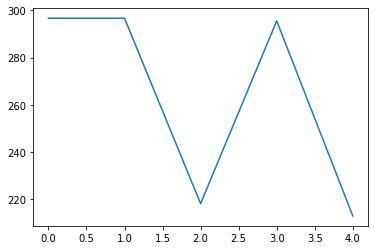

In [75]:
import matplotlib.pyplot as plt
plt.plot(loss_values)

### (3.2) Use a search over a grid to find the best RGB combination

TBD Explanation

In [77]:
grid_steps = 6
red = np.linspace(0, 255, grid_steps)
green = np.linspace(0, 255, grid_steps)
blue = np.linspace(0, 255, grid_steps)

grid_combinations = []
for r in red:
    for g in green:
        for b in blue:
            combination = (r,g,b)
            grid_combinations.append(combination)
grid_combinations

[(0.0, 0.0, 0.0),
 (0.0, 0.0, 51.0),
 (0.0, 0.0, 102.0),
 (0.0, 0.0, 153.0),
 (0.0, 0.0, 204.0),
 (0.0, 0.0, 255.0),
 (0.0, 51.0, 0.0),
 (0.0, 51.0, 51.0),
 (0.0, 51.0, 102.0),
 (0.0, 51.0, 153.0),
 (0.0, 51.0, 204.0),
 (0.0, 51.0, 255.0),
 (0.0, 102.0, 0.0),
 (0.0, 102.0, 51.0),
 (0.0, 102.0, 102.0),
 (0.0, 102.0, 153.0),
 (0.0, 102.0, 204.0),
 (0.0, 102.0, 255.0),
 (0.0, 153.0, 0.0),
 (0.0, 153.0, 51.0),
 (0.0, 153.0, 102.0),
 (0.0, 153.0, 153.0),
 (0.0, 153.0, 204.0),
 (0.0, 153.0, 255.0),
 (0.0, 204.0, 0.0),
 (0.0, 204.0, 51.0),
 (0.0, 204.0, 102.0),
 (0.0, 204.0, 153.0),
 (0.0, 204.0, 204.0),
 (0.0, 204.0, 255.0),
 (0.0, 255.0, 0.0),
 (0.0, 255.0, 51.0),
 (0.0, 255.0, 102.0),
 (0.0, 255.0, 153.0),
 (0.0, 255.0, 204.0),
 (0.0, 255.0, 255.0),
 (51.0, 0.0, 0.0),
 (51.0, 0.0, 51.0),
 (51.0, 0.0, 102.0),
 (51.0, 0.0, 153.0),
 (51.0, 0.0, 204.0),
 (51.0, 0.0, 255.0),
 (51.0, 51.0, 0.0),
 (51.0, 51.0, 51.0),
 (51.0, 51.0, 102.0),
 (51.0, 51.0, 153.0),
 (51.0, 51.0, 204.0),
 (51.0, 51.0, 

In [82]:
import random
import numpy as np
import cv2

# Function to generate random color
def generate_random_color():
    red = random.randint(0, 255)
    green = random.randint(0, 255)
    blue = random.randint(0, 255)
    return blue, green, red  # OpenCV uses BGR color format

# Function to calculate the loss between two colors
def calculate_loss(color1, color2):
    return np.sqrt((color1[0] - color2[0]) ** 2 + (color1[1] - color2[1]) ** 2 + (color1[2] - color2[2]) ** 2)

# Create a blank image
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)

# Create a named window for display
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
cv2.startWindowThread()

# Define font properties for displaying text
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)  # White color

# Define the goal color
goal_color = (0, 0, 255)  # Red color (BGR format)

# Create an empty list to store the loss values
loss_values = []

# Main loop
num_iterations = 0  # Initialize the iteration counter
max_iterations = len(grid_combinations)  # Set the desired number of iterations

candidate_color = grid_combinations[0]

for grid_combination in grid_combinations:
    

    # STEP 1: Synthesis
    # Update the live image with the current color
    image[:, :] = candidate_color
    
    # Display the image
    cv2.imshow("Live Image", image)
    
    # STEP 2: Characterisation
    # Measure the color
    rgb_measurement = characterise()
    # rgb_measurement = tuple(reversed(rgb_measurement))
    
    # STEP 3: Planning
    
    # Calculate the loss between the goal color and the current color
    loss = calculate_loss(goal_color, rgb_measurement)

    # Add the loss value to the list
    loss_values.append(loss)    

    # Add text information to the image
    text = f"Iteration: {num_iterations + 1}"
    cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

    # Plot a subplot for the goal color
    # subplot_x = num_iterations * (width // (max_iterations + 1))
    subplot_x = width // (max_iterations + 1)
    subplot_width = width // (max_iterations + 1)
    cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), goal_color, -1)

    # Add text for the loss
    loss_text = f"Loss: {loss:.2f}"
    cv2.putText(image, loss_text, (10, height - 10), font, font_scale, font_color, 2)

    # Draw the graph of loss values
    if len(loss_values) > 1:
        for i in range(1, len(loss_values)):
            x1 = (i - 1) * (width // max_iterations)
            y1 = height - int(loss_values[i - 1] * (height - 60) / max(loss_values))
            x2 = i * (width // max_iterations)
            y2 = height - int(loss_values[i] * (height - 60) / max(loss_values))
            cv2.line(image, (x1, y1), (x2, y2), (255, 255, 255), 2)

    # Increment the iteration counter
    cv2.imshow("Live Image", image)
    cv2.waitKey(100)  # Adjust the wait time (in milliseconds) as needed
    
    # Generate a new candidate color, for now we will pick one randomly
    candidate_color = grid_combination
    
    num_iterations += 1

# Close the window after the desired number of iterations
cv2.waitKey(1)
cv2.destroyAllWindows()
cv2.waitKey(1)

Error: Invalid data format


TypeError: 'NoneType' object is not subscriptable

somtimes work for 20 iterations sometimes break down within 2 iterations, could be the issue with my mircobit, could try with a new one when we meet next week.

### (3.3) Use Bayesian Optimisation to search for the optimal RGB combination

In [87]:
import serial
import time
import numpy as np
import cv2
from bayes_opt import BayesianOptimization
from bayes_opt import UtilityFunction

ser = serial.Serial("/dev/cu.usbmodem142102", 115200)

# Define the optimization goal
goal_color = (0, 0, 255)  # Red color (BGR format)

# Initialize CV2 window for live image display
width, height = 800, 400
image = np.zeros((height, width, 3), dtype=np.uint8)
cv2.namedWindow("Live Image", cv2.WINDOW_NORMAL)
font = cv2.FONT_HERSHEY_SIMPLEX
font_scale = 0.8
font_color = (255, 255, 255)

max_iterations = 15  # Set the desired number of iterations

serial_line_tested = False

def calculate_loss(color1, color2):
    return np.sqrt(
        (color1[0] - color2["R"]) ** 2
        + (color1[1] - color2["G"]) ** 2
        + (color1[2] - color2["B"]) ** 2
    )

def measure_outcome():

    # R,G,B=characterise()
    new_sample = {}
    # while True:
    #     color, val = serial_data.split(":")
    #     new_sample[str(color)] = int(val)
    #     if color == "B":
    #         break
    #     else:
    #         serial_data = str(ser.readline().decode('utf-8'))
    new_sample["RGB"] = characterise()
    # Make sure the keys "R", "G", and "B" exist in the new_sample dictionary
    for color_key in ["R", "G", "B"]:
        if color_key not in new_sample:
            new_sample[color_key] = 0

    new_sample["outcome"] = calculate_loss(goal_color, new_sample)
    new_sample["time"] = time.time()

    print(new_sample)
    return new_sample

def objective_function(R, G, B):
    # Simulate the outcome based on the RGB values
    outcome = calculate_loss(goal_color, {'R': R, 'G': G, 'B': B})
    return outcome

# Define the utility function (Expected Improvement)
utility = UtilityFunction(kind="ei", kappa=2.5, xi=0.0)

loss_values = []

if __name__ == "__main__":
    # Define the search space bounds
    pbounds = {'R': (0, 255), 'G': (0, 255), 'B': (0, 255)}

    # Define the Bayesian optimization function
    optimizer = BayesianOptimization(
        f=objective_function,
        pbounds=pbounds,
        random_state=1,
        verbose=2
    )

    for iteration in range(max_iterations):
        # Measure the outcome from the micro:bit
        new_sample = measure_outcome()

        # Update the optimizer with the new sample
        optimizer.register(params={'R': new_sample['R'], 'G': new_sample['G'], 'B': new_sample['B']}, target=new_sample['outcome'])

        # Optimize the acquisition function to get the next sample
        next_sample = optimizer.suggest(utility_function=utility)

        # Update the live image with the current color
        image[:, :] = [next_sample['B'], next_sample['G'], next_sample['R']]

        # Add text information to the image
        text = f"Iteration: {iteration + 1}"
        cv2.putText(image, text, (10, 30), font, font_scale, font_color, 2)

        # Add text for the loss
        loss_text = f"Loss: {new_sample['outcome']:.2f}"
        cv2.putText(image, loss_text, (10, height - 10), font, font_scale, font_color, 2)
        # Plot a subplot for the goal color
        subplot_x = width // (max_iterations + 1)
        subplot_width = width // (max_iterations + 1)
        cv2.rectangle(image, (subplot_x, 60), (subplot_x + subplot_width, height - 60), goal_color, -1)
        
        # Calculate the loss between the goal color and the current color
        loss = calculate_loss(goal_color, {'R': next_sample['R'], 'G': next_sample['G'], 'B': next_sample['B']})
        # Add the loss value to the list
        loss_values.append(loss)
        
        # Display the updated image
        cv2.imshow("Live Image", image)
        cv2.waitKey(500)

        # Other optimization steps (omitted for clarity)

    # Save the final image
    cv2.imwrite("final_image.png", image)

    # Close the CV2 window
    cv2.destroyAllWindows()

plt.plot(loss_values)


Error: Invalid data format
{'RGB': None, 'R': 0, 'G': 0, 'B': 0, 'outcome': 255.0, 'time': 1690144911.3136451}
{'RGB': (11, 7, 58), 'R': 0, 'G': 0, 'B': 0, 'outcome': 255.0, 'time': 1690144912.155216}


NotUniqueError: Data point [0 0 0] is not unique. You can set "allow_duplicate_points=True" to avoid this error

"allow_duplicate_points=True" error again, need to check if the issue is with the microbit itself or the codes.